In [1]:
import keras


Using TensorFlow backend.


# Data Set Preprocessing


In [2]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())
    print(json.dumps(games, indent=4, sort_keys=True))
    

{
    "competition": [
        {
            "@attributes": {
                "ID": "1",
                "title": "easyCredit BBL Hauptrunde"
            },
            "spiel": [
                {
                    "arenaLat": "49.77337",
                    "arenaLon": "9.93923",
                    "arenaName": "S.Oliver-Arena",
                    "bbl_spielID": "20826",
                    "datum": "2017-09-29",
                    "gast": "Brose Bamberg",
                    "gastCity": "Brose Bamberg",
                    "gast_id": "420",
                    "gast_result": "73",
                    "home": "s.Oliver W\u00fcrzburg",
                    "homeCity": "W\u00fcrzburg",
                    "home_id": "540",
                    "home_result": "76",
                    "init_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "live_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "spiel_nummer": "0",
                 

In [3]:


arena=[]
home_ids=[]
for i in range(0,len(games['competition'][0]['spiel'])):
               
    if games['competition'][0]['spiel'][i]['home_id'] not in home_ids:
        arena.append(games['competition'][0]['spiel'][i]['arenaName'])
        home_ids.append(games['competition'][0]['spiel'][i]['home_id'])

print(arena)
print(len(arena))
print(home_ids)

               

['S.Oliver-Arena', 'Volkswagen Halle', 'Sparkassen Arena', 'ratiopharm arena', 'Sparkassen Arena', 'Sporthalle Gießen-Ost', 'Paul-Horn-Arena', 'Stadthalle', 'Mercedes Benz Arena', 'Brose Arena', 'Fraport Arena', 'Oberfrankenhalle', 'Audi Dome', 'Messehalle Erfurt', 'Telekom Dome', 'Stadthalle Bremerhaven', 'EWE Arena ', 'MHP Arena']
18
['540', '422', '483', '418', '477', '421', '432', '428', '413', '420', '426', '425', '486', '517', '415', '439', '430', '433']


In [4]:
from datetime import datetime

datetime_object = datetime.strptime(games['competition'][0]['spiel'][0]['datum']+" "+games['competition'][0]['spiel'][0]['uhrzeit']  , '%Y-%m-%d %H:%M:%S')

print(datetime_object)
print(datetime_object.strftime('%U'))
print(datetime_object.strftime('%w'))


2017-09-29 20:30:00
39
5


In [5]:
#dictionary für die Hallenkapazitäten
arenakap = {486:6594,413:14500,433:4200,420:6150,415:6000,425:3300,430:6000,426:5002,540:3140,418:6200,421:4003,422:3603,483:3076,477:3447,428:3000,439:4200,517:3533,432:3132}
print(arenakap)
print(len(arenakap))


{486: 6594, 413: 14500, 433: 4200, 420: 6150, 415: 6000, 425: 3300, 430: 6000, 426: 5002, 540: 3140, 418: 6200, 421: 4003, 422: 3603, 483: 3076, 477: 3447, 428: 3000, 439: 4200, 517: 3533, 432: 3132}
18


In [6]:
print(type(games['competition'][0]['spiel'][0]['home_id']))
#Die JSON Informationen sind als String angegeben

<class 'str'>


Deshalb parse (int) ich die Zuschauer und home_id für die weitere Berechnung

In [7]:
#Dataset zusammenstellen
dataset=[]

for i in range(0,len(games['competition'][0]['spiel'])):
    datasetrow=[]     
    datasetrow.append(games['competition'][0]['spiel'][i]['home_id'])
    datasetrow.append(games['competition'][0]['spiel'][i]['gast_id'])
    datasetrow.append(int(games['competition'][0]['spiel'][i]['home_result']>games['competition'][0]['spiel'][i]['gast_result']))
    datasetrow.append(int(games['competition'][0]['spiel'][i]['zuschauer']))
    datasetrow.append(arenakap[int(games['competition'][0]['spiel'][i]['home_id'])])
    
    dataset.append(datasetrow)

print(dataset)



[['540', '420', 1, 3140, 3140], ['422', '439', 1, 2316, 3603], ['483', '426', 0, 2071, 3076], ['418', '413', 0, 6200, 6200], ['477', '430', 0, 2703, 3447], ['421', '486', 0, 3618, 4003], ['432', '425', 0, 2850, 3132], ['428', '517', 1, 2500, 3000], ['413', '439', 0, 8877, 14500], ['420', '421', 1, 6150, 6150], ['426', '477', 1, 4640, 5002], ['483', '540', 0, 2292, 3076], ['425', '428', 1, 3211, 3300], ['486', '422', 0, 6123, 6594], ['517', '430', 0, 2465, 3533], ['415', '418', 1, 4670, 6000], ['439', '433', 0, 2480, 4200], ['413', '432', 1, 7543, 14500], ['517', '420', 0, 2391, 3533], ['477', '486', 0, 3125, 3447], ['418', '425', 0, 6200, 6200], ['428', '413', 0, 2650, 3000], ['430', '483', 1, 5018, 6000], ['540', '439', 1, 3021, 3140], ['432', '420', 0, 2400, 3132], ['422', '415', 0, 2431, 3603], ['421', '517', 0, 3189, 4003], ['433', '426', 1, 2700, 4200], ['426', '422', 1, 3340, 5002], ['430', '425', 0, 5007, 6000], ['477', '413', 0, 2912, 3447], ['486', '540', 0, 5912, 6594], ['483

In [8]:
# Umwandlung des Datasets in ein Numpy Array 
import numpy as np
# : -> auslesen aller zeilen
dataset=np.asarray(dataset)
print(dataset[:,0])
print(len(dataset))

['540' '422' '483' '418' '477' '421' '432' '428' '413' '420' '426' '483'
 '425' '486' '517' '415' '439' '413' '517' '477' '418' '428' '430' '540'
 '432' '422' '421' '433' '426' '430' '477' '486' '483' '433' '432' '415'
 '425' '418' '413' '422' '428' '486' '421' '540' '421' '413' '422' '477'
 '415' '433' '430' '439' '426' '418' '540' '486' '428' '483' '420' '425'
 '432' '517' '477' '422' '421' '432' '483' '439' '413' '426' '433' '420'
 '428' '418' '430' '425' '439' '415' '486' '517' '420' '477' '426' '430'
 '432' '421' '540' '415' '486' '439' '413' '486' '422' '425' '418' '433'
 '483' '517' '420' '428' '426' '540' '486' '432' '420' '421' '415' '425'
 '420' '439' '422' '418' '477' '433' '517' '430' '426' '483' '421' '418'
 '425' '428' '413' '540' '432' '422' '426' '517' '477' '420' '433' '483'
 '413' '540' '415' '418' '517' '439' '432' '428' '430' '425' '422' '477'
 '439' '421' '433' '430' '426' '428' '420' '421' '415' '430' '428' '439'
 '415' '517' '540' '413' '418' '421' '433' '432' '4

One hot encoding



In [9]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_home_ids = encoder.fit_transform(dataset[:,0])

print(transformed_home_ids)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [10]:
#ohne fit, damit die Teams eindeutig bleiben, nur transformation notwendig
transformed_gast_ids = encoder.transform(dataset[:,1])
print(transformed_gast_ids)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
# Umformung der Zuschauer in eine Spalte (vorher war es nur eine Zeile)
print(np.reshape(dataset[:,3],(306,1)))


[['3140']
 ['2316']
 ['2071']
 ['6200']
 ['2703']
 ['3618']
 ['2850']
 ['2500']
 ['8877']
 ['6150']
 ['4640']
 ['2292']
 ['3211']
 ['6123']
 ['2465']
 ['4670']
 ['2480']
 ['7543']
 ['2391']
 ['3125']
 ['6200']
 ['2650']
 ['5018']
 ['3021']
 ['2400']
 ['2431']
 ['3189']
 ['2700']
 ['3340']
 ['5007']
 ['2912']
 ['5912']
 ['2024']
 ['2627']
 ['2650']
 ['4350']
 ['3018']
 ['6200']
 ['8111']
 ['1699']
 ['1950']
 ['5256']
 ['2985']
 ['3012']
 ['2928']
 ['7991']
 ['1901']
 ['3024']
 ['4510']
 ['3806']
 ['5384']
 ['7100']
 ['4600']
 ['6200']
 ['3140']
 ['5831']
 ['2400']
 ['2608']
 ['6150']
 ['3199']
 ['3000']
 ['2230']
 ['3254']
 ['3025']
 ['3325']
 ['3132']
 ['2150']
 ['2085']
 ['13566']
 ['4820']
 ['3629']
 ['6150']
 ['2050']
 ['6200']
 ['5079']
 ['3300']
 ['2567']
 ['5320']
 ['5743']
 ['3635']
 ['6150']
 ['3447']
 ['4900']
 ['6000']
 ['3050']
 ['3314']
 ['3112']
 ['5500']
 ['6700']
 ['2327']
 ['9154']
 ['6167']
 ['2589']
 ['3300']
 ['6200']
 ['3499']
 ['3076']
 ['2287']
 ['6150']
 ['2100']

In [12]:
# Featurescaling der Zuschaueranzahl & Hallenkapazitäten
from sklearn.preprocessing import MinMaxScaler

arenaKap_scaler=MinMaxScaler()
arenaKap_scaler.fit([[0],[14500]]) #Maximum Berlin und 0 Minimum
#reshaping
transformed_zuschauer=arenaKap_scaler.transform(np.reshape(dataset[:,3],(306,1)))
transformed_kap=arenaKap_scaler.transform(np.reshape(dataset[:,4],(306,1)))
print(transformed_kap)

[[0.21655172]
 [0.24848276]
 [0.21213793]
 [0.42758621]
 [0.23772414]
 [0.27606897]
 [0.216     ]
 [0.20689655]
 [1.        ]
 [0.42413793]
 [0.34496552]
 [0.21213793]
 [0.22758621]
 [0.45475862]
 [0.24365517]
 [0.4137931 ]
 [0.28965517]
 [1.        ]
 [0.24365517]
 [0.23772414]
 [0.42758621]
 [0.20689655]
 [0.4137931 ]
 [0.21655172]
 [0.216     ]
 [0.24848276]
 [0.27606897]
 [0.28965517]
 [0.34496552]
 [0.4137931 ]
 [0.23772414]
 [0.45475862]
 [0.21213793]
 [0.28965517]
 [0.216     ]
 [0.4137931 ]
 [0.22758621]
 [0.42758621]
 [1.        ]
 [0.24848276]
 [0.20689655]
 [0.45475862]
 [0.27606897]
 [0.21655172]
 [0.27606897]
 [1.        ]
 [0.24848276]
 [0.23772414]
 [0.4137931 ]
 [0.28965517]
 [0.4137931 ]
 [0.28965517]
 [0.34496552]
 [0.42758621]
 [0.21655172]
 [0.45475862]
 [0.20689655]
 [0.21213793]
 [0.42413793]
 [0.22758621]
 [0.216     ]
 [0.24365517]
 [0.23772414]
 [0.24848276]
 [0.27606897]
 [0.216     ]
 [0.21213793]
 [0.28965517]
 [1.        ]
 [0.34496552]
 [0.28965517]
 [0.42

### Data - Zusammenfügen der Spalten home_ids, gast_ids,  zuschauer, Hallenkapazität, home_win

In [13]:
data=np.c_[transformed_home_ids,transformed_gast_ids,transformed_zuschauer,transformed_kap,dataset[:,2]]
print(data)

[['0' '0' '0' ... '0.21655172413793106' '0.21655172413793106' '1']
 ['0' '0' '0' ... '0.1597241379310345' '0.24848275862068966' '1']
 ['0' '0' '0' ... '0.14282758620689656' '0.21213793103448278' '0']
 ...
 ['0' '0' '0' ... '0.3913793103448276' '0.41379310344827586' '0']
 ['0' '0' '0' ... '0.21655172413793106' '0.21655172413793106' '1']
 ['0' '0' '0' ... '0.1620689655172414' '0.20689655172413793' '0']]


In [14]:
print(len(data[0]))

39


# Netz Modellierung

In [15]:
# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 38, kernel_initializer = 'uniform', activation = 'relu', input_shape = (38,)))

# Adding the second hidden layer
#regressor.add(Dense(units = 18, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Summary anzeigen
regressor.summary()

# Compiling the ANN - wie soll es lernen
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])#binary_crossentropy

# Fitting the ANN to the Training set 
#input = data[:,0:4] output= (data[:,4]
history = regressor.fit(data[:,0:38], data[:,38], batch_size = 10, epochs = 100, validation_split = 0.1)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 38)                1482      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 39        
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 0s 676us/step - loss: 0.2498 - acc: 0.5127 - val_loss: 0.2495 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 143us/step - loss: 0.2484 - acc: 0.5745 - val_loss: 0.2484 - val_acc: 0.5484
Epoch 3/100
275/275 [==============================] - 0s 141us/step - loss: 0.2459 - acc: 0.5964 - val_loss: 0.2457 - val_acc: 0.6129
Epoch 4/100
275/275 [==============================] - 0s 138us/step - loss: 0.2413 - 

275/275 [==============================] - 0s 140us/step - loss: 0.1244 - acc: 0.8545 - val_loss: 0.2105 - val_acc: 0.7097
Epoch 57/100
275/275 [==============================] - 0s 143us/step - loss: 0.1235 - acc: 0.8545 - val_loss: 0.2104 - val_acc: 0.7419
Epoch 58/100
275/275 [==============================] - 0s 136us/step - loss: 0.1232 - acc: 0.8509 - val_loss: 0.2115 - val_acc: 0.7097
Epoch 59/100
275/275 [==============================] - 0s 134us/step - loss: 0.1223 - acc: 0.8509 - val_loss: 0.2100 - val_acc: 0.7097
Epoch 60/100
275/275 [==============================] - 0s 140us/step - loss: 0.1207 - acc: 0.8618 - val_loss: 0.2105 - val_acc: 0.7419
Epoch 61/100
275/275 [==============================] - 0s 139us/step - loss: 0.1197 - acc: 0.8618 - val_loss: 0.2111 - val_acc: 0.7419
Epoch 62/100
275/275 [==============================] - 0s 136us/step - loss: 0.1187 - acc: 0.8655 - val_loss: 0.2085 - val_acc: 0.7419
Epoch 63/100
275/275 [==============================] - 0s 13

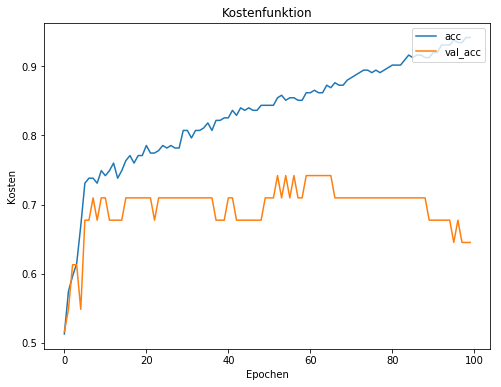

In [17]:
#
import matplotlib.pyplot as plt

handles = []

label, = plt.plot(history.history['acc'], label="acc")
handles.append(label)
label, = plt.plot(history.history['val_acc'], label="val_acc")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('Kosten')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()



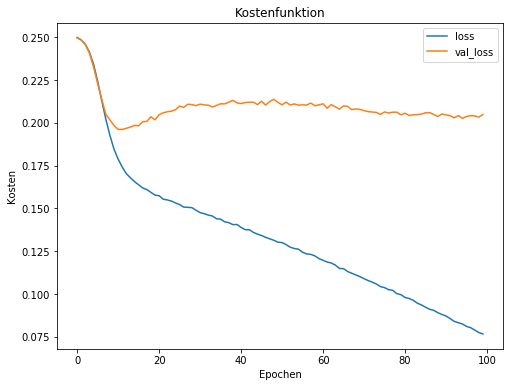

In [18]:
handles = []

label, = plt.plot(history.history['loss'], label="loss")
handles.append(label)
label, = plt.plot(history.history['val_loss'], label="val_loss")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('Kosten')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()

In [15]:
import time as tm
import datetime
import pickle
      
        
def create_file_name():
    ts = tm.time()
    name = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S') + '_ann'
    return name

path='./Netze/'
name_file= create_file_name()



In [93]:
with open(path + name_file + '.pkl', 'wb') as output:
    ann_net = {'history_val_loss':history.history['val_loss'],'history_loss':history.history['loss']}
    pickle.dump(ann_net, output)

In [96]:
with open(path + '20180521172401_ann.pkl', 'rb') as input:
    ann_net = pickle.load(input)
    print(ann_net[15])

10
